In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from IPython.display import clear_output

In [6]:
file_path = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/cara.csv'
cars = pd.read_csv(file_path)
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [7]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
cars = cars.dropna(subset=features)

In [8]:
data = cars[features].copy()

#center 
data = ((data - data.min()) / (data.max() - data.min()) )
data.describe()

,year,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,0.326040,0.131515,0.195404,0.205011,0.270165
std,0.032037,0.109614,0.106915,0.055945,0.086474
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.312500,0.056214,0.051724,0.174033,0.200000
50%,0.328125,0.102689,0.250000,0.210497,0.240000
75%,0.343750,0.174862,0.250000,0.248066,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#init
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample().iloc[0]))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [17]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
year,0.343750,0.312500,0.343750,0.296875,0.343750
mileage,0.173612,0.014411,0.177941,0.239238,0.168242
tax,0.250000,0.258621,0.258621,0.250000,0.250000
mpg,0.132597,0.217127,0.114365,0.197238,0.149724
engineSize,0.460000,0.300000,0.400000,0.300000,0.240000


In [18]:
def get_labels(data, centroids):
    disatances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return disatances.idxmin(axis=1)

In [19]:
lables = get_labels(data, centroids)
lables.value_counts()

1    6667
4    5432
3    3744
2    1625
0     497
Name: count, dtype: int64

In [20]:
def new_centroids(data, lables):
    return data.groupby(lables).apply(lambda x: x.mean()).T

In [21]:
centroids = new_centroids(data, lables)
centroids

,0,1,2,3,4
year,0.330389,0.343886,0.327615,0.290598,0.327696
mileage,0.116738,0.047706,0.135804,0.290001,0.125209
tax,0.228440,0.225660,0.271247,0.121535,0.183474
mpg,0.182791,0.209089,0.145493,0.229468,0.202987
engineSize,0.463380,0.250421,0.399495,0.301250,0.216605


In [24]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centrods_2d = pca.transform(centroids.T)
    
    clear_output(wait=True)
    
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y = data_2d[:,1], c=labels)
    plt.scatter(x=centrods_2d[:,0], y = centrods_2d[:,1])
    plt.show()

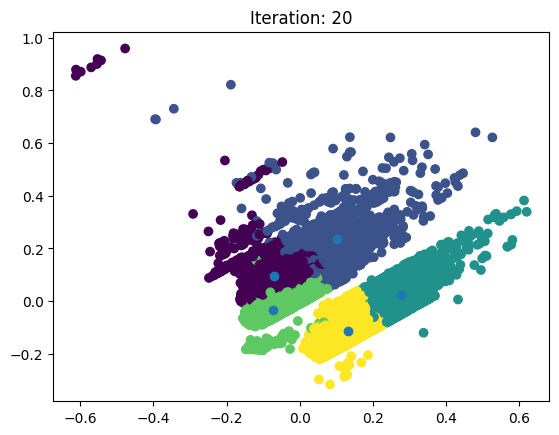

In [23]:
max_iteration = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels)
    plot_cluster(data, labels, centroids, iteration)
    iteration += 1